<a href="https://colab.research.google.com/github/higordevellard/hotel_sentiment_analysis/blob/main/NLP_Hotel_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - NLP - Review de Hotels (EM DESENVOLVIMENTO)
# Sprint 02 - MVP parte 02






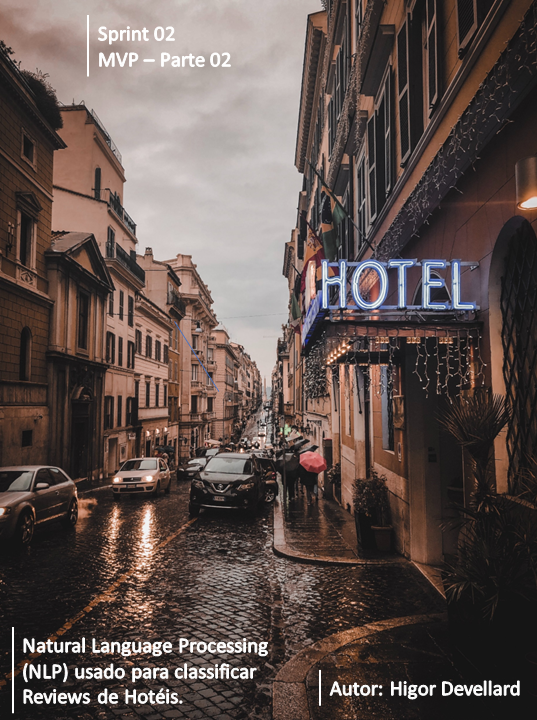

In [19]:
import requests
from PIL import Image
from io import BytesIO

# Carregar a capa do projeto usando a biblioteca PIL
imagem_1 = 'https://raw.githubusercontent.com/higordevellard/hotel_sentiment_analysis/main/images/imagem_1.png'
request_imagem = requests.get(imagem_1)
imagem = Image.open(BytesIO(request_imagem.content))
imagem.show()


## 1.Motivação

*   A satisfação do cliente desempenha um papel fundamental na indústria hoteleira, pois representa a base para o sucesso e a prosperidade de qualquer hotel. Quando os hóspedes estão satisfeitos, eles não apenas retornam ao estabelecimento, mas também o recomendam a amigos e familiares, resultando em um aumento no número de reservas e na reputação positiva do hotel. Além disso, a satisfação do cliente é um indicador crucial da qualidade dos serviços oferecidos, refletindo a capacidade do hotel em atender às expectativas e necessidades dos hóspedes. Ao priorizar a satisfação do cliente, os hotéis podem garantir uma experiência memorável e personalizada, desde o momento da reserva até o check-out.
*   Este projeto tem como objetivo utilizar técnicas de NLP para analisar um dataset contendo reviews elaborados por clientes e assim categorizar os comentários dando notas de zero à cinco.


## 2.Pacotes Usados

In [20]:
# Configuração para não exibir os warnings dos pacotes selecionados
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import requests
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split




In [21]:
# Configuração para não exibir os warnings dos pacotes selecionados
import warnings
warnings.filterwarnings("ignore")

# instalando dependências
! pip install transformers[torch] datasets evaluate scikit-learn matplotlib

## 3.Carga do Dataset

O dataset escolhido para este projeto está disponível no Kaggle, conforme o seguinte endereço: https://www.kaggle.com/code/sahillyraina/electric-faults-detection-classification/input


In [22]:
# Localicazão do dataset
url_1 = 'https://raw.githubusercontent.com/higordevellard/hotel_sentiment_analysis/main/review_hotel.csv'

# Labels dos atributos do dataset
labels_atributos = ['Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', \
                    'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', \
                    'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', \
                    'days_since_review']
# Lê o arquivo
dataset = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')


### **3.1Informações sobre o dataset**

*   O dataset pode ser encontrado no Kaggle, no endereço abaixo, onde foi coletados reviews referente à diversos hoteis em regiões dos Estados Unidos:

https://www.kaggle.com/code/jonathanoheix/sentiment-analysis-with-hotel-reviews/notebook

O dataset carregado contém 13 atributos, sendo eles:

**Review_Date:** data em que foi feito o review.

**Average_Score:**nota média do hotel.

**Hotel_Name:**nome do hotel.

**Reviewer_Nationality:**nacionalidade do usuário que elaborou o review.

**Negative_Review:**pontos negativos sobre o hotel.

**Review_Total_Negative_Word_Counts:**quantidade total de palavras negativas.

**Total_Number_of_Reviews:**quantidade total de reviews do hotel.

**Positive_Review:**Pontos positivos da review.

**Review_Total_Positive_Word_Counts:**quantidade total de palavras positivas.

**Total_Number_of_Reviews_Reviewer_Has_Given:**quantidade de reviews que o usuário fez.

**Reviewer_Score:**nota do review.

**Tags:**tags usadas.

**days_since_review:**quantidade de dias que a review foi feita.



## 4.Análise Exploratória de Dados

###4.1 Análise e Tratamento dos dados

In [23]:
# Mostra as dimensões do dataset (linhas e colunas)
dataset.shape

(65000, 13)

In [24]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Review_Date                                 65000 non-null  object 
 1   Average_Score                               65000 non-null  float64
 2   Hotel_Name                                  65000 non-null  object 
 3   Reviewer_Nationality                        65000 non-null  object 
 4   Negative_Review                             65000 non-null  object 
 5   Review_Total_Negative_Word_Counts           65000 non-null  int64  
 6   Total_Number_of_Reviews                     65000 non-null  int64  
 7   Positive_Review                             65000 non-null  object 
 8   Review_Total_Positive_Word_Counts           65000 non-null  int64  
 9   Total_Number_of_Reviews_Reviewer_Has_Given  65000 non-null  int64  
 10  Reviewer_S

**Observações importantes levantadas após os resultados da função .info():**

1)Todos os 13 atributos foram devidamente carregados.

2)Todas as 65.000 Instâncias (linhas) são não nulas (Sem missings).



In [25]:
# Mostra as 5 primeiras linhas do dataset
dataset.head(5)

,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days
3,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


Como no dataset as avaliações positivas estão armazenadas em um atributo e as negativas em outro, será necessário realizar a concatenação dos dois atributos.

In [26]:
dataset["review"] = dataset["Negative_Review"] + dataset["Positive_Review"]

In [27]:
dataset.head()

,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review
0,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,I am so angry that i made this post available...
1,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,No Negative No real complaints the hotel was g...
2,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,Rooms are nice but for elderly a bit difficul...
3,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,My room was dirty and I was afraid to walk ba...
4,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,You When I booked with your company on line y...


Considerando que no atributo "Reviewer_Score" é dada uma nota ao hotel, será dado uma classificação para cada faixa de nota.

In [28]:
def assign_value(x):
    if x < 3:
        return 0
    elif x >= 3 and x < 5:
        return 1
    elif x >= 5 and x < 6:
        return 2
    elif x >= 6 and x < 8:
        return 3
    else:
        return 4

dataset["review_classification"] = dataset["Reviewer_Score"].apply(assign_value)

In [29]:
dataset_2 = dataset[["review", "review_classification"]]
dataset_2.head()

,review,review_classification
0,I am so angry that i made this post available...,0
1,No Negative No real complaints the hotel was g...,3
2,Rooms are nice but for elderly a bit difficul...,3
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,3


### **4.2.Estatísticas Descritivas**

**Balanceamento dos Dados**

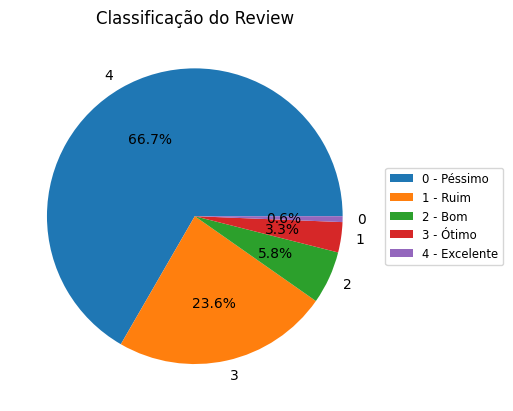

In [30]:
# Obtendo a contagem dos valores únicos do atributo "Tipo_de_Curto_Circuito"
contagem_valores = dataset_2['review_classification'].value_counts()

# Obtendo os valores únicos e suas respectivas contagens
valores_unicos = contagem_valores.index
contagens = contagem_valores.values

# Definindo as descrições correspondentes a cada valor único
descricoes = ['0 - Péssimo',
              '1 - Ruim',
              '2 - Bom',
              '3 - Ótimo',
              '4 - Excelente']

# Plotando o gráfico de pizza com porcentagem
plt.pie(contagens, labels=valores_unicos, autopct='%1.1f%%')

# Adicionando a legenda personalizada ao lado do gráfico
plt.legend(descricoes, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Definindo o título do gráfico
plt.title('Classificação do Review')

# Exibindo o gráfico
plt.show()

Pelo gráfico acima, pode-se perceber que há um desbalanceamento, onde mais de 65% dos registros estão na faixa (0 - Péssimo).

---

# **5.Modelagem e Inferência**

## Separação em conjunto de treino e conjunto de teste com holdout

In [31]:
train_size = 0.8  # proporção para treino
test_size = 0.2  # proporção para teste

# Proporção dos dados de teste para validação
validation_ratio = 0.3

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    random_state=seed,
                                                    stratify=y)

# Divisão dos dados de teste em teste e validação
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                test_size=validation_ratio,
                                                random_state=seed,
                                                stratify=y_test)


In [32]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# carregando modelo

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

## **6.Conclusão**